In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import math
import random
import os
import time

from numpy import interp

import warnings
warnings.filterwarnings('ignore')

In [15]:
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [16]:
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
#seed_all(seed)

In [17]:
train = pd.read_csv("../data/raw/heart_cleveland_upload.csv")
train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0


In [18]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

Train data has 14 features, 297 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']



In [19]:
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [20]:
train.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

## Decode categories

In [21]:
train['sex'] = train['sex'].map({0:'female',1:'male'})
train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})
train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})
train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})

In [22]:
# masks for easier selection
categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

# Categorical

In [23]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

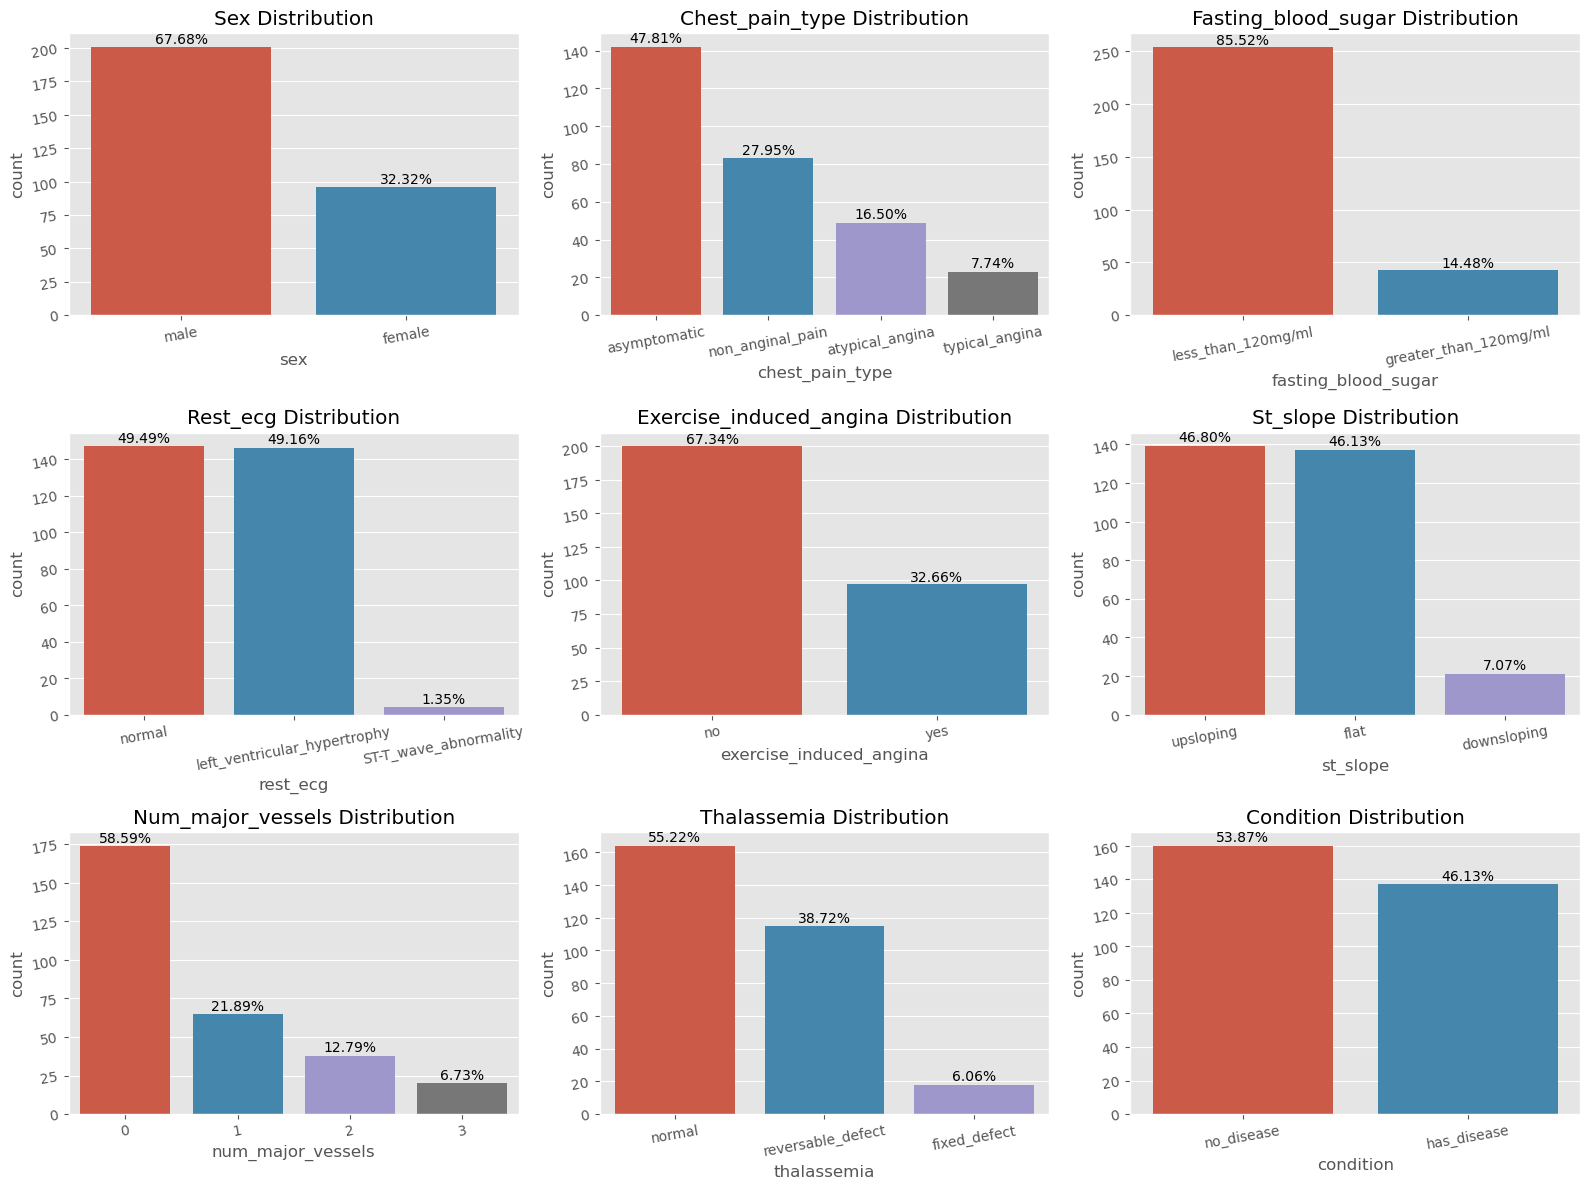

In [24]:
ctg_dist(train, categorical)

# Numerical data

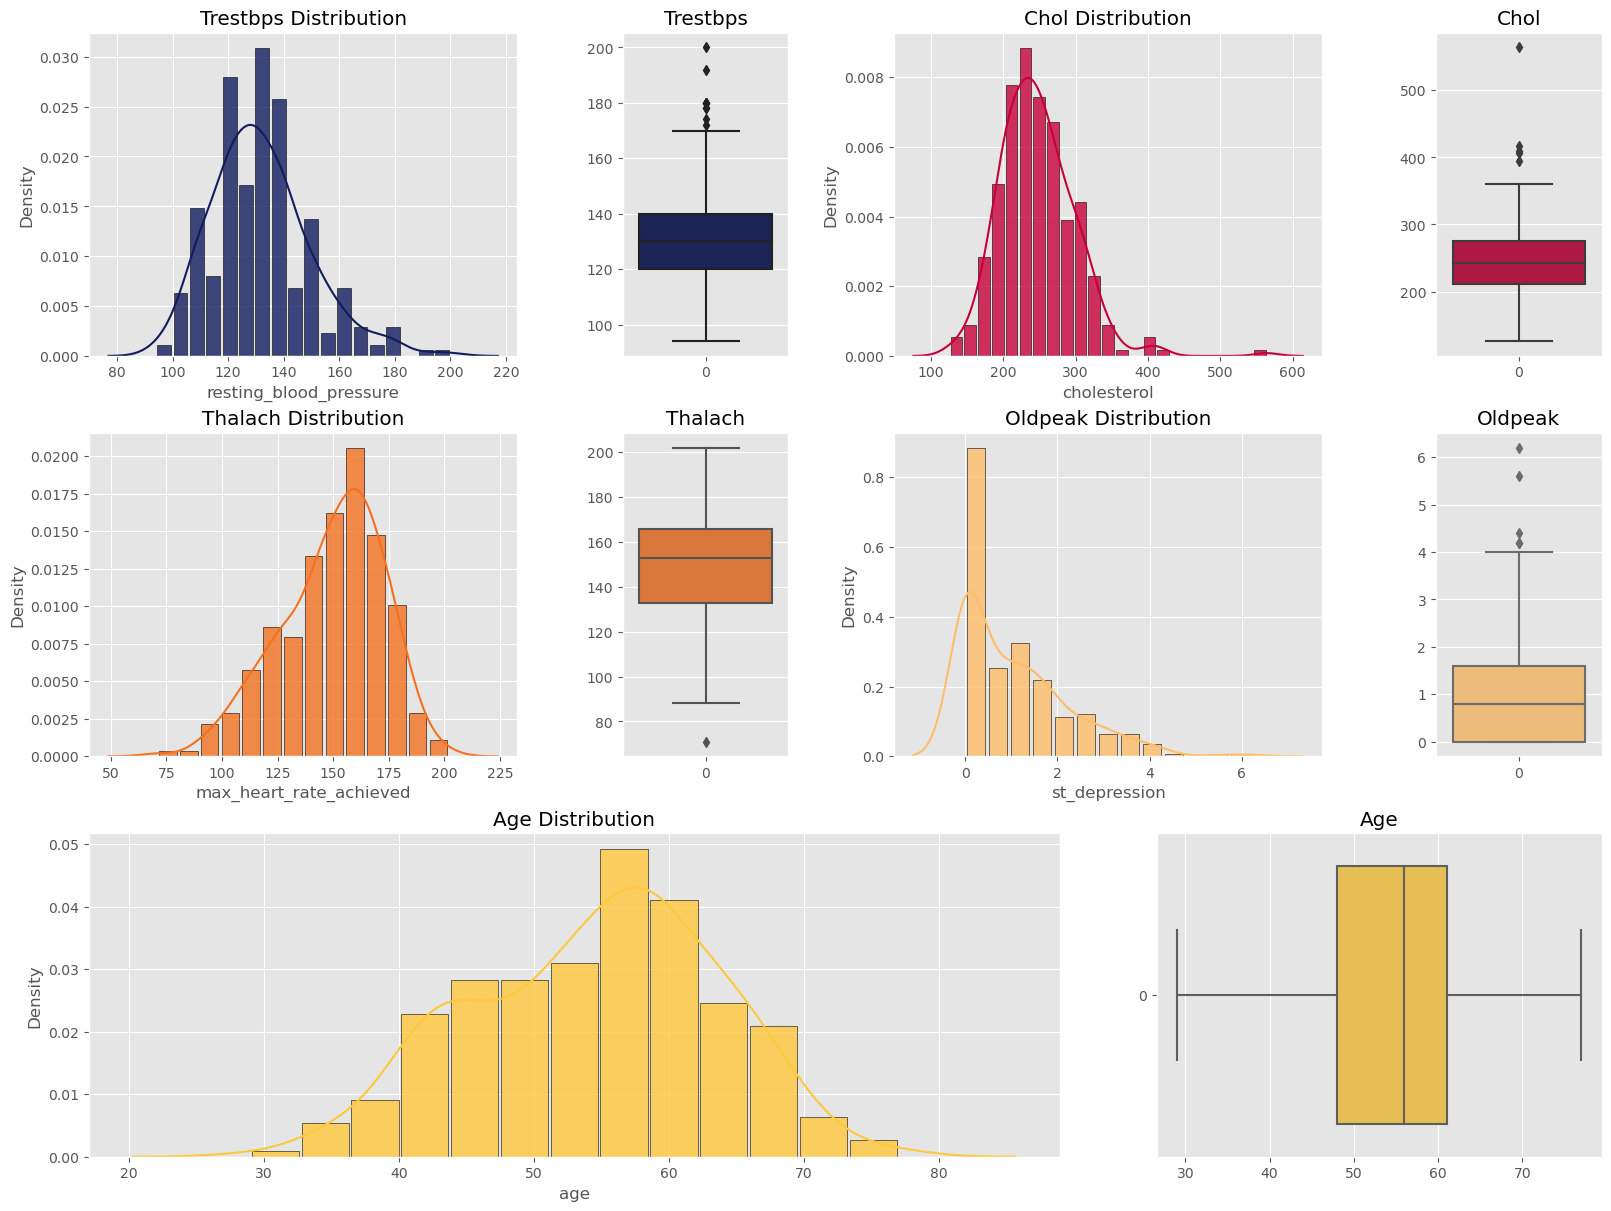

In [25]:
# Displaying numeric distribution

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

<Figure size 1600x1000 with 0 Axes>

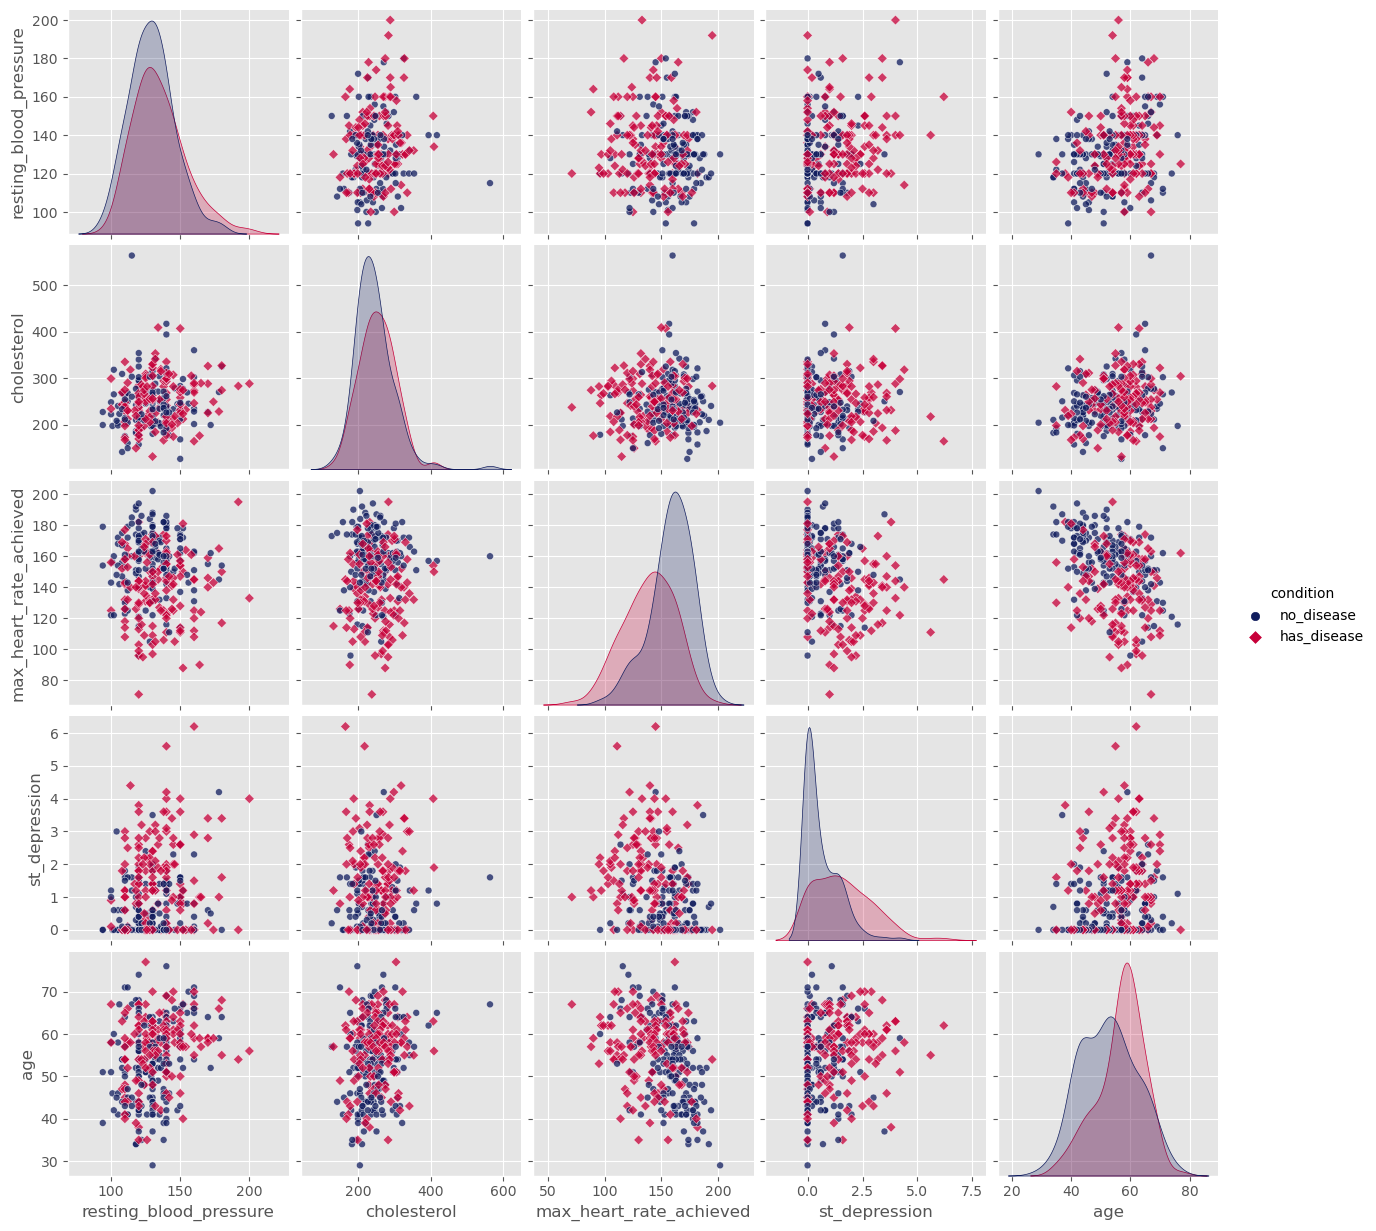

In [27]:
plt.figure(figsize=(16, 10))
sns.pairplot(train[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], hue='condition', palette=cust_palt,
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75)
            )

plt.show()